In [1]:
import pandas as pd

df=pd.read_csv('electronics_small.csv')

C:\Users\DRASHTI\.conda\envs\tens\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df

,overall,vote,verified,reviewTime,reviewText,summary
0,5,67,True,1999-09-18,This is the best novel I have read in 2 or 3 y...,A star is born
1,3,5,True,2013-10-23,"Pages and pages of introspection, in the style...",A stream of consciousness novel
2,5,4,True,2008-09-02,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...
3,5,13,True,2000-09-04,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!
4,3,8,True,2000-02-04,I was taken in by reviews that compared this b...,A dissenting view--In part.
...,...,...,...,...,...,...
2999995,1,0,True,2017-07-07,don't work for surface 3,One Star
2999996,5,0,True,2017-03-13,Good quality cable for Surface RT2 nice video ...,Five Stars
2999997,5,0,True,2018-01-23,The best part of this lens is its close up abi...,Five Stars
2999998,5,0,True,2017-11-09,Solidly built lens with remarkably high defini...,Best bang for the buck out there.


In [3]:

import numpy as np

from sklearn.metrics import accuracy_score
import sklearn

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression


from sklearn import tree


import pickle
from sklearn.pipeline import Pipeline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
import string
import warnings
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm


warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk import tokenize,WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet


In [4]:
df[['review','sentiment']]=df[['reviewText','overall']]

df=df[['review', 'sentiment']]

df['sentiment']=df['sentiment'].replace([1,2,3,4,5],[0,0,0,1,1])


In [5]:
df

,review,sentiment
0,This is the best novel I have read in 2 or 3 y...,1
1,"Pages and pages of introspection, in the style...",0
2,This is the kind of novel to read when you hav...,1
3,What gorgeous language! What an incredible wri...,1
4,I was taken in by reviews that compared this b...,0
...,...,...
2999995,don't work for surface 3,0
2999996,Good quality cable for Surface RT2 nice video ...,1
2999997,The best part of this lens is its close up abi...,1
2999998,Solidly built lens with remarkably high defini...,1


In [6]:
df.sentiment.unique()

array([1, 0], dtype=int64)

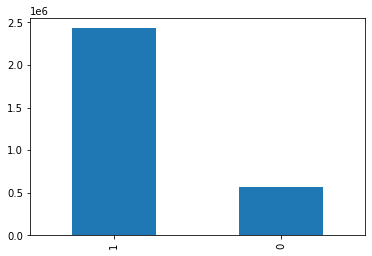

In [7]:

df['sentiment'].value_counts().plot(kind='bar');

In [8]:

df=df.dropna()


In [9]:
df.shape


(2999617, 2)

In [10]:

stopwords1 = list(stopwords.words('english'))+list(punctuation) 

ps=PorterStemmer()
lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
   
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None


In [11]:

def lemmatize_sentence(sentence):  
   
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
   
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

   
    lemmatized_sentence = []      
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
       
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

   
    return " ".join(lemmatized_sentence)

print(lemmatize_sentence(" i have been working on my skills "))


i have be work on my skill


In [12]:
df['review'][1]

'Pages and pages of introspection, in the style of writers like Henry James.  I like this kind of  novels and the writer occasionally delights me with her descriptions and observations.  But it\'s way too repetitious for me and, I think, some parts could have been cut out while still preserving, and probably more tightly crystallizing, the themes and "truths" within the story.\n\nIt\'s a story I could relate to but I wish it hadn\'t been too tedious to read.'

In [13]:

print(lemmatize_sentence(df['review'][1]))

Pages and page of introspection , in the style of writer like Henry James . I like this kind of novel and the writer occasionally delight me with her description and observation . But it 's way too repetitious for me and , I think , some part could have be cut out while still preserve , and probably more tightly crystallize , the theme and `` truth '' within the story . It 's a story I could relate to but I wish it have n't be too tedious to read .


In [14]:
def clean_text(a):
    return  ' '.join([i.lower() for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
 
   
    if len(ls)>2:
        val= ' '.join(ls)
        return val
    else :
        return None

   

In [15]:
def clean_text_lemma(a):
    val= ' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val



def clean_text_stem(a):   
    val= ' '.join([ps.stem(i.lower()) for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val

df['clean_txt'] = df['review'].apply(clean_text)


In [16]:
df['review']=df['clean_txt']

df.dropna()



,review,sentiment,clean_txt
0,best novel read 2 3 years everything fiction -...,1,best novel read 2 3 years everything fiction -...
1,pages pages introspection style writers like h...,0,pages pages introspection style writers like h...
2,kind novel read time lose book days possibly w...,1,kind novel read time lose book days possibly w...
3,gorgeous language incredible writer last life ...,1,gorgeous language incredible writer last life ...
4,taken reviews compared book leopard promised b...,0,taken reviews compared book leopard promised b...
...,...,...,...
2999995,n't work surface 3,0,n't work surface 3
2999996,good quality cable surface rt2 nice video outp...,1,good quality cable surface rt2 nice video outp...
2999997,best part lens close ability wide angle photog...,1,best part lens close ability wide angle photog...
2999998,solidly built lens remarkably high definition ...,1,solidly built lens remarkably high definition ...


In [17]:
df1=df[['review', 'sentiment']]

df=df1

def simple_split(df,y,l,sm=0.8):
    if sm>0 and sm<1.0:
        n=int(sm*l)
    else:
        n=int(sm)
    X_train=df[:n].copy()
    X_test=df[n:].copy()
    y_train=y[:n].copy()
    y_test=y[n:].copy()
    return X_train,X_test,y_train,y_test
        

v=CountVectorizer()

X_train,X_test,y_train,y_test=simple_split(df.review, df.sentiment, len(df))

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

print(np.bincount(y_train))

print(np.bincount(y_test))


(2399693,) (599924,) (2399693,) (599924,)
[ 443712 1955981]
[126472 473452]


In [46]:
print("Logistic regression")
clf2=LogisticRegression(solver="lbfgs")
model=Pipeline([('vectorizer',v),('classifier',clf2)])
model.fit(X_train, y_train)
p=model.predict(X_test)

Logistic regression


In [47]:
print(confusion_matrix(p,y_test))

[[ 72916  20448]
 [ 53556 453004]]


In [48]:
accuracy_score(p, y_test)

0.8766443749541608